In [1]:
import numpy as np
import pandas as pd

mandarine_consume = pd.read_excel('predict_consume.xlsx', index_col='년도')
mandarine_consume
mandarine_consume.describe()
mandarine_consume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1985 to 2019
Data columns (total 8 columns):
 귤도매가격           24 non-null float64
귤소매가격            27 non-null float64
오렌지도매가격          22 non-null float64
오렌지소매가격          22 non-null float64
생산자물가지수(감귤)      34 non-null float64
소비자물가지수(감귤)      35 non-null float64
1인당 가처분소득        26 non-null float64
1인당 연간소비량(kg)    21 non-null float64
dtypes: float64(8)
memory usage: 2.5 KB


In [3]:
# 결측치 제거
mandarine_consume = mandarine_consume.dropna()
mandarine_consume
# 변수명 영어로 변경
mandarine_consume.columns = ['mand_whole_price', 'mand_retail_price', 'orange_whole_price', 'orange_retail_price',
                            'product_index', 'consumer_index', 'per_person_income', 'per_person_consume_kg', 'gpd_deflator']

In [4]:
# 실질 가격으로 변환
mandarine_consume['mand_whole_price_N'] = mandarine_consume.mand_whole_price / mandarine_consume.product_index
mandarine_consume['mand_retail_price_N'] = mandarine_consume.mand_retail_price / mandarine_consume.consumer_index
mandarine_consume['orange_whole_price_N'] = mandarine_consume.orange_whole_price / mandarine_consume.product_index
mandarine_consume['orange_retail_price_N'] = mandarine_consume.orange_retail_price / mandarine_consume.consumer_index
mandarine_consume['per_person_income_N'] = mandarine_consume.per_person_consume_kg / mandarine_consume.gpd_deflator

mandarine_consume

,mand_whole_price,mand_retail_price,orange_whole_price,orange_retail_price,product_index,consumer_index,per_person_income,per_person_consume_kg,gpd_deflator,mand_whole_price_N,mand_retail_price_N,orange_whole_price_N,orange_retail_price_N,per_person_income_N
년도,,,,,,,,,,,,,,
2000,7417.333333,11800.000000,14240.000000,52580.0,58.74,55.410,61964.6448,11.9,72.119,126.273976,212.957950,242.424242,948.926187,0.165005
2002,5312.000000,8866.666667,22410.000000,63440.0,84.83,84.325,75338.7816,13.3,76.892,62.619356,105.148730,264.175410,752.327305,0.172970
2003,9075.000000,26300.000000,17700.000000,56280.0,57.45,63.620,82105.3168,13.0,79.544,157.963446,413.392015,308.093995,884.627476,0.163432
2004,12609.000000,27000.000000,18720.000000,58280.0,96.77,85.198,90825.8304,12.0,82.032,130.298646,316.908848,193.448383,684.053616,0.146284
2005,12133.000000,16500.000000,16700.000000,63520.0,143.35,106.735,95684.7528,13.1,82.887,84.638995,154.588467,116.498082,595.118752,0.158046
2006,13026.000000,31800.000000,18650.000000,63380.0,100.05,84.334,99341.6424,12.7,82.702,130.194903,377.072118,186.406797,751.535561,0.153563
2007,7101.000000,13100.000000,23090.000000,70610.0,157.50,109.137,107368.2552,16.0,84.702,45.085714,120.032620,146.603175,646.984982,0.188898
2008,12719.000000,22100.000000,19320.000000,60350.0,59.02,67.663,116943.7992,13.0,87.096,215.503219,326.618684,327.346662,891.920252,0.149261
2009,11353.000000,19300.000000,27400.000000,80370.0,73.20,93.346,124746.3936,15.2,90.239,155.095628,206.757654,374.316940,860.990294,0.168442


In [5]:
mandarine_consume_df = mandarine_consume[['mand_whole_price_N','mand_retail_price_N','orange_whole_price_N','orange_retail_price_N',
                       'per_person_income_N', 'per_person_consume_kg']]
mandarine_consume_df

,mand_whole_price_N,mand_retail_price_N,orange_whole_price_N,orange_retail_price_N,per_person_income_N,per_person_consume_kg
년도,,,,,,
2000,126.273976,212.957950,242.424242,948.926187,0.165005,11.9
2002,62.619356,105.148730,264.175410,752.327305,0.172970,13.3
2003,157.963446,413.392015,308.093995,884.627476,0.163432,13.0
2004,130.298646,316.908848,193.448383,684.053616,0.146284,12.0
2005,84.638995,154.588467,116.498082,595.118752,0.158046,13.1
2006,130.194903,377.072118,186.406797,751.535561,0.153563,12.7
2007,45.085714,120.032620,146.603175,646.984982,0.188898,16.0
2008,215.503219,326.618684,327.346662,891.920252,0.149261,13.0
2009,155.095628,206.757654,374.316940,860.990294,0.168442,15.2


In [6]:
mandarine_consume_df.describe()

,mand_whole_price_N,mand_retail_price_N,orange_whole_price_N,orange_retail_price_N,per_person_income_N,per_person_consume_kg
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,125.662297,244.783496,242.456148,515.666752,0.146680,13.072222
std,47.121784,86.481032,80.564612,328.593532,0.021361,1.183616
min,45.085714,105.148730,113.462606,119.362809,0.111268,11.600000
25%,90.859247,192.303972,188.167193,185.576297,0.135193,12.100000
50%,128.234439,224.894166,267.983758,621.051867,0.146404,13.000000
75%,157.848704,308.818905,302.133837,833.824547,0.162085,13.550000
max,215.503219,413.392015,374.316940,948.926187,0.188898,16.000000


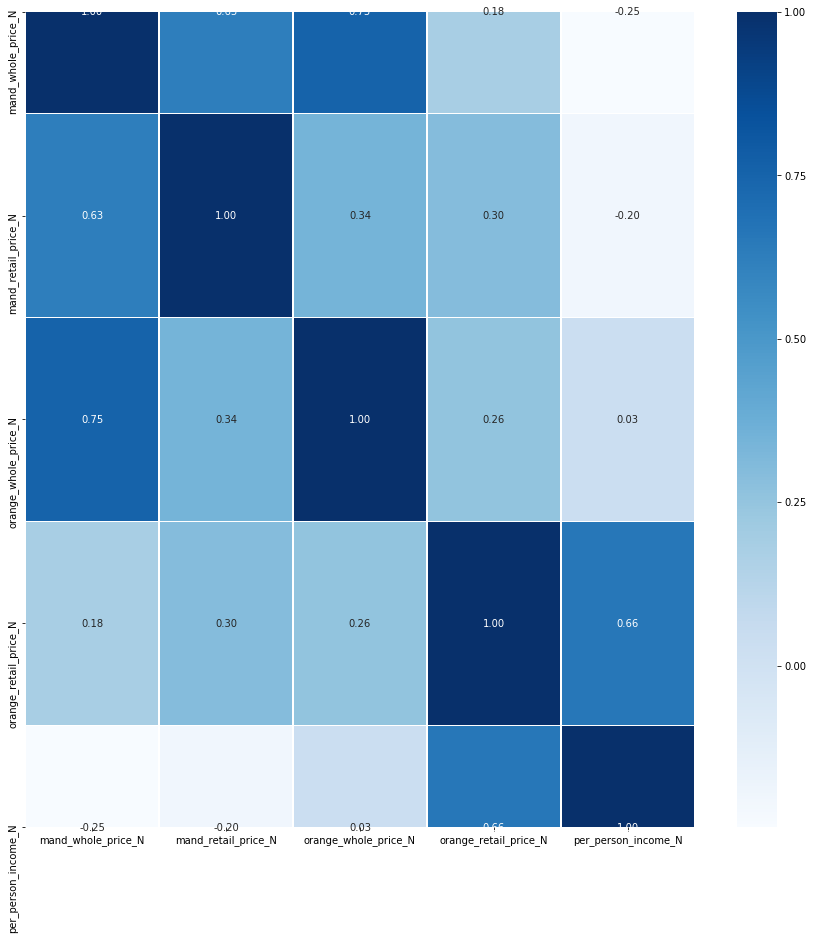

In [7]:
# 변수들끼리 상관관계를 분석해봅시다
y = mandarine_consume_df.iloc[:,-1]
X = mandarine_consume_df.iloc[:,:-1]


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data=X.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [8]:
X.corr()
# retail / wholesale price 는 둘 중 하나만 골라서 넣도록 하고...
# 소득이랑 오렌지 소비자가가 관계가 높은건 어쩌지...
# 귤이랑 오렌지 도매가의 상관성도 갱장히 높음

,mand_whole_price_N,mand_retail_price_N,orange_whole_price_N,orange_retail_price_N,per_person_income_N
mand_whole_price_N,1.000000,0.626670,0.753771,0.181962,-0.247302
mand_retail_price_N,0.626670,1.000000,0.342336,0.296906,-0.200070
orange_whole_price_N,0.753771,0.342336,1.000000,0.257544,0.031801
orange_retail_price_N,0.181962,0.296906,0.257544,1.000000,0.657937
per_person_income_N,-0.247302,-0.200070,0.031801,0.657937,1.000000


In [9]:
mandarine_consume_df2 = mandarine_consume[['mand_whole_price_N','orange_whole_price_N',
                       'per_person_income_N', 'per_person_consume_kg']]
mandarine_consume_df2

y = mandarine_consume_df2.iloc[:,-1]
X = mandarine_consume_df2.iloc[:,:-1]
X

,mand_whole_price_N,orange_whole_price_N,per_person_income_N
년도,,,
2000,126.273976,242.424242,0.165005
2002,62.619356,264.175410,0.172970
2003,157.963446,308.093995,0.163432
2004,130.298646,193.448383,0.146284
2005,84.638995,116.498082,0.158046
2006,130.194903,186.406797,0.153563
2007,45.085714,146.603175,0.188898
2008,215.503219,327.346662,0.149261
2009,155.095628,374.316940,0.168442


In [10]:
# 정규화 4가지 버젼 다 해보쟝
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale, StandardScaler
scale_X = scale(X)
robust_X = robust_scale(X)
minmax_X = minmax_scale(X)
maxabs_X = maxabs_scale(X)
scaler = StandardScaler()
stdScale_X = scaler.fit(X)

18

In [11]:
# train / test set을 나눕시당
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minmax_X, y, random_state=0)


In [12]:
# 최소자승법을 해봅시다!
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
result.summary()

C:\Users\ICT01_13\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     per_person_consume_kg   R-squared (uncentered):                   0.885
Model:                               OLS   Adj. R-squared (uncentered):              0.851
Method:                    Least Squares   F-statistic:                              25.76
Date:                   Mon, 20 Jan 2020   Prob (F-statistic):                    5.08e-05
Time:                           21:10:38   Log-Likelihood:                         -37.398
No. Observations:                     13   AIC:                                      80.80
Df Residuals:                         10   BIC:                                      82.49
Df Model:                              3                                                  
Covariance Type:               nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.5020      9.635      1.817      0.099      -3.965      38.969
x2            -6.1173      9.838     -0.622      0.548     -28.037      15.802
x3            12.7886      4.880      2.621      0.026       1.916      23.661
==============================================================================
Omnibus:                        0.604   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.573
Skew:                           0.112   Prob(JB):                        0.751
Kurtosis:                       1.997   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train, y_train)
lg.predict(X_test)
lg.score(X_test, y_test)

# 13%라니... 울고싶닼ㅋㅋㅋㅋㅋ

0.13601763985674886

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm

from sklearn.ensemble import RandomForestRegressor


mandarine_consume_dropna = mandarine_consume.dropna()
y = mandarine_consume_dropna.iloc[:,-1]
X = mandarine_consume_dropna.iloc[:,:-1]